In [1]:
##### heading ######
using ITensors
using ITensorMPS
using HDF5
using LaTeXStrings
using Plots
using JLD2


In [50]:
##### Reading psi_evo Data ######

band_evo = 1
Psi_evo_length = 11 
file_psi = h5open(string("psi_evo_", band_evo, ".h5"), "r")

psi_evo = MPS[]

for i in 1:Psi_evo_length
  
  evo_name = "psi_evo_$(i)"
  
  
   mps = read(file_psi, evo_name,MPS)

  
  push!(psi_evo, mps)
end

# Close the HDF5 file
close(file_psi)

In [2]:
##### Reading Data ######

data = jldopen("time_evo_data.jld2", "r") do file
  Ene_H0 = read(file, "Ene_H0")
  Ene_H_time = read(file, "Ene_H_time")
  S_site = read(file, "S_site")
  #Sy_i = read(file, "Sy_i")
  #Sx_i = read(file, "Sx_i")
  DW_C = read(file, "DW_C")
  #Cy = read(file, "Cy")
  #Cx = read(file, "Cx")
  return (Ene_H0, Ene_H_time, S_site, DW_C)
end

# Unpack the data
Ene_H0, Ene_H_time, S_site, DW_C = data;


[ Info: Saved animation to /Users/g.q/Desktop/Julia/DMRG/New simulation 10.03.2023/Real parameters/n_61_single/BC1/anim_fps15.gif


Plots.AnimatedGif("/Users/g.q/Desktop/Julia/DMRG/New simulation 10.03.2023/Real parameters/n_61_single/BC1/anim_fps15.gif")
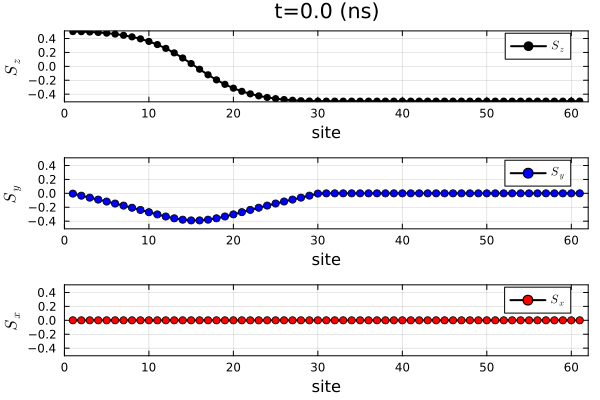

In [11]:
tau =0.01
ttotal = 2
N = 61

ttotal/tau 
t_i=0.0:tau:ttotal
ymax=N+1
anim=@animate for i ∈ 1:1:Int(ttotal/tau+1)
    fig = plot(layout = grid(3,1))
    plot!(fig[1],S_site[i][1],label=L"S_z",lw=2,lc=:black,marker=(:circle,4,:black,:black),framestyle =:box,xlims=(0,ymax),
    ylims=(-0.51,0.51),xlabel=("site"), ylabel=(L"$S_z$"),title=(string("t=",round(t_i[i]*4.136*10^-3,sigdigits=4)," (ns)")))


    plot!(fig[2],S_site[i][2],label=L"S_y",lw=2,lc=:black,marker=(:circle,4,:blue,:blue),framestyle =:box,xlims=(0,ymax),
    ylims=(-0.51,0.51),xlabel=("site"), ylabel=(L"$S_y$"))


    plot!(fig[3],S_site[i][3],label=L"S_x",lw=2,lc=:black,marker=(:circle,4,:red,:red),framestyle =:box,xlims=(0,ymax),
    ylims=(-0.51,0.51),xlabel=("site"), ylabel=(L"$S_x$"))
end
gif(anim, "anim_fps15.gif", fps = 50)

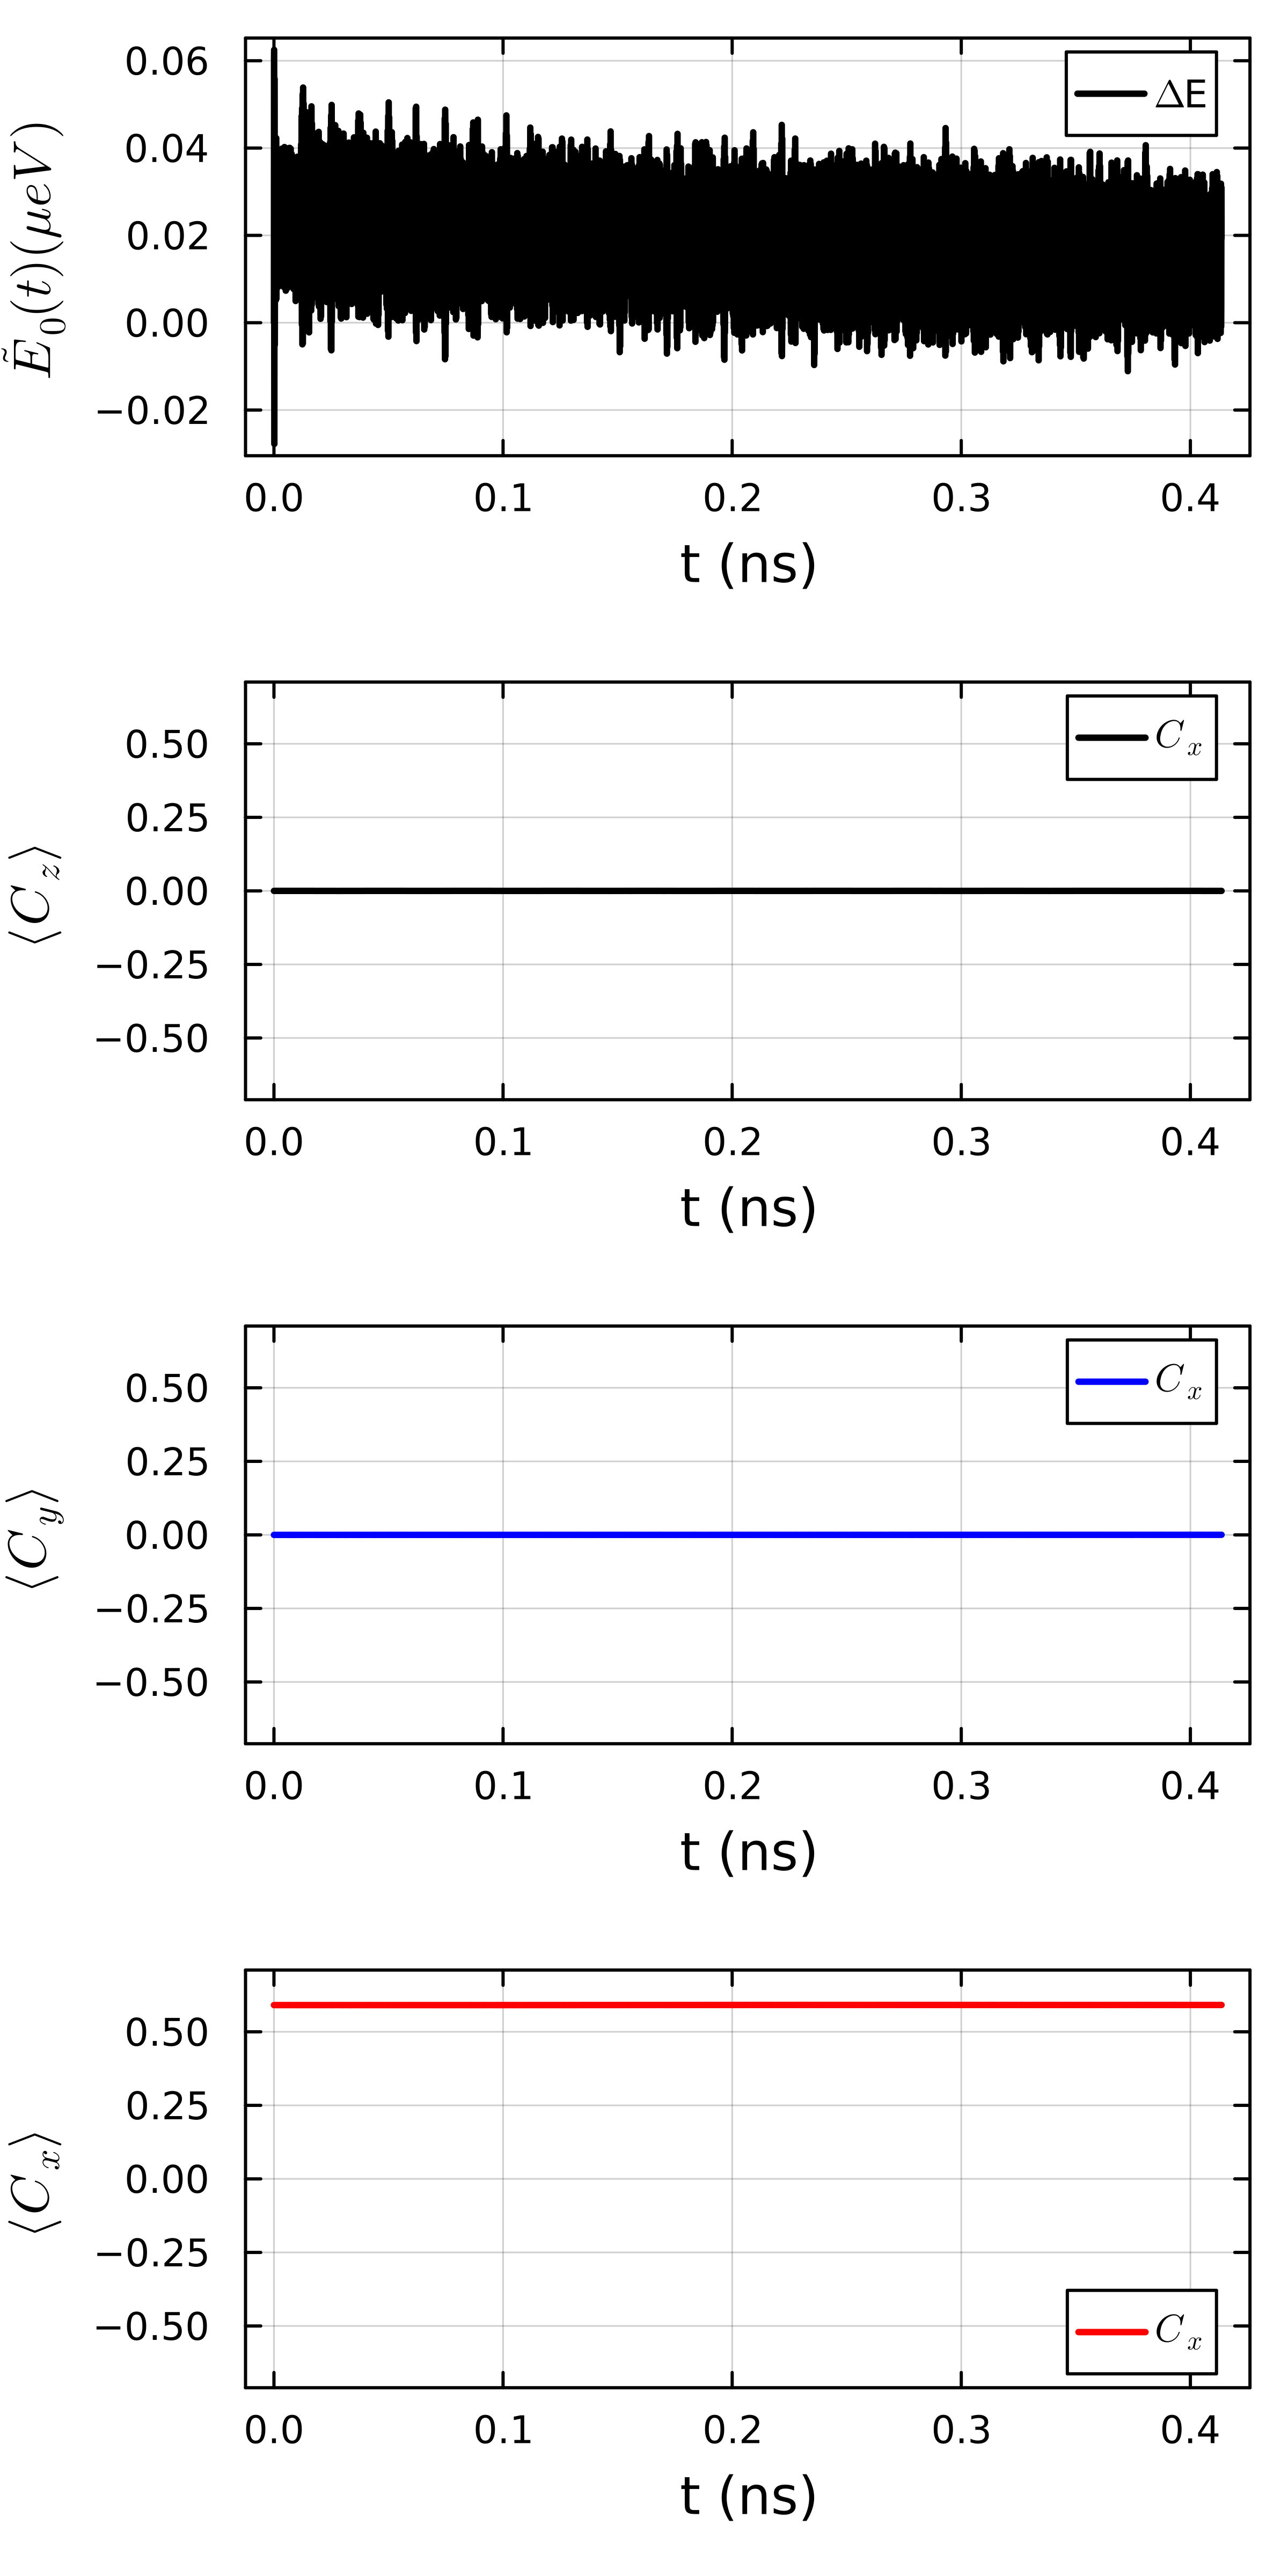

In [5]:
t_i=0.0:tau:ttotal;
t_i=t_i*4.136*10^-3

DW_z = map(real, [row[1] for row in DW_C])
DW_y = map(real, [row[2] for row in DW_C])
DW_x = map(real, [row[3] for row in DW_C])

plot_ar=[]
p_temp=plot(t_i,(Ene_H_time.-Ene_H_time[1])*1000,label=L"$\Delta$E",lw=2,lc=:black,framestyle =:box,xlabel=("t (ns)"), ylabel=(L"$\tilde{E}_0(t) (\mu eV)$"))
push!(plot_ar,p_temp)

p_temp=plot(t_i,DW_z,label=L"C_x",lw=2,lc=:black,framestyle =:box,xlabel=("t (ns)"), ylabel=(L"$ \leftangle C_z \rightangle$"),ylims=(-0.71,0.71))
push!(plot_ar,p_temp)

p_temp=plot(t_i,DW_y,label=L"C_x",lw=2,lc=:blue,framestyle =:box,xlabel=("t (ns)"), ylabel=(L"$\leftangle C_y \rightangle$"),ylims=(-0.71,0.71))
push!(plot_ar,p_temp)

p_temp=plot(t_i,DW_x,label=L"C_x",lw=2,lc=:red,framestyle =:box,xlabel=("t (ns)"), ylabel=(L"$\leftangle C_x \rightangle$"),ylims=(-0.71,0.71))
push!(plot_ar,p_temp)

plot_time=plot(plot_ar[1],plot_ar[2],plot_ar[3],plot_ar[4],layout = grid(4,1,heights=[0.25,0.25, 0.25, 0.25]),size=(400,800),dpi=600,left_margin = 5Plots.mm)

#savefig(plot_time,"plot_time.pdf")

10001